<a href="https://colab.research.google.com/github/diogocarneiro20/System-fail-prediction-/blob/main/Analisepreditivadefalhas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

In [12]:
sns.set()
# %matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [13]:
sns.set()
# %matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [14]:
os.listdir('/content/drive/My Drive/')

["'HistoricoEscolar' .pdf",
 'Colab Notebooks',
 'Cópia de Projeto I - Primeiro Semestre 2023 - Aplicação de Métodos de Aprendizagem de Máquina',
 'pima-data.gsheet',
 'diabetes.xlsx',
 'BostonHousing.xlsx',
 'Amazon_Reviews.xlsx',
 'component_failure_prediction.xlsx']

In [15]:
dados = '/content/drive/My Drive/component_failure_prediction.xlsx'

In [16]:
data = pd.read_excel(dados)

In [17]:
data.head()

,ï»¿UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [18]:
data.drop(['ï»¿UDI', 'Product ID'], axis = 1, inplace = True)

In [19]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [21]:
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].astype('float')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  float64
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 625.1+ KB


In [23]:
data['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [24]:
data['Failure Type'].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [25]:
data[(data['Target'] == 1) & (data['Failure Type'] == 'No Failure')]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1437,H,298.8,309.9,1439.0,45.2,40,1,No Failure
2749,M,299.7,309.2,1685.0,28.9,179,1,No Failure
4044,M,301.9,310.9,1419.0,47.7,20,1,No Failure
4684,M,303.6,311.8,1421.0,44.8,101,1,No Failure
5536,M,302.3,311.8,1363.0,54.0,119,1,No Failure
5941,L,300.6,310.7,1438.0,48.5,78,1,No Failure
6478,L,300.5,309.8,1663.0,29.1,145,1,No Failure
8506,L,298.4,309.6,1710.0,27.3,163,1,No Failure
9015,L,297.2,308.1,1431.0,49.7,210,1,No Failure


In [26]:
data = data[~((data['Target'] == 1) & (data['Failure Type'] == 'No Failure'))]

In [27]:
data[(data['Target'] == 0) & (data['Failure Type'] != 'No Failure')]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
1221,M,297.0,308.3,1399.0,46.4,132,0,Random Failures
1302,L,298.6,309.8,1505.0,45.7,144,0,Random Failures
1748,H,298.4,307.7,1626.0,31.1,166,0,Random Failures
2072,L,299.6,309.5,1570.0,35.5,189,0,Random Failures
2559,L,299.3,309.0,1447.0,50.4,140,0,Random Failures
3065,M,300.1,309.2,1687.0,27.7,95,0,Random Failures
3452,H,301.6,310.5,1602.0,32.3,2,0,Random Failures
5471,L,302.7,312.3,1346.0,61.2,170,0,Random Failures
5489,L,302.6,312.1,1499.0,35.0,215,0,Random Failures
5495,H,302.9,312.5,1357.0,55.0,12,0,Random Failures


In [28]:
data = data[~((data['Target'] == 0) & (data['Failure Type'] != 'No Failure'))]

In [29]:
data.shape

(9973, 8)

<Axes: >

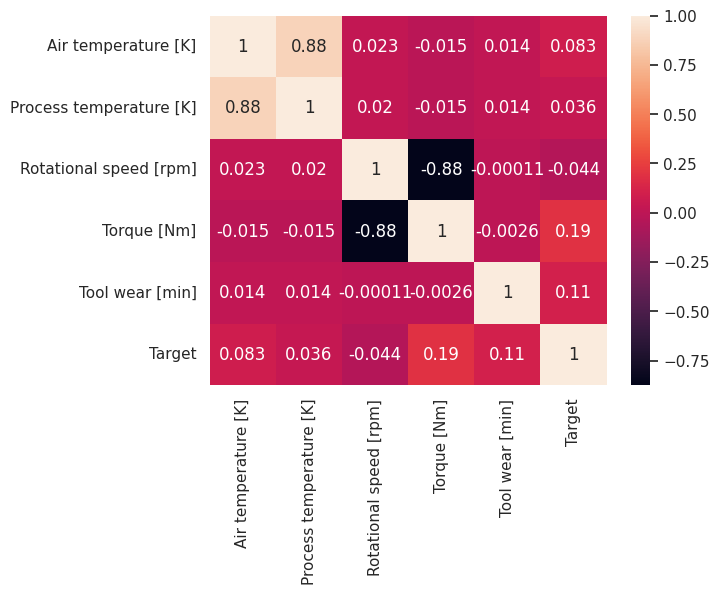

In [30]:
sns.heatmap(data.corr(), annot = True)

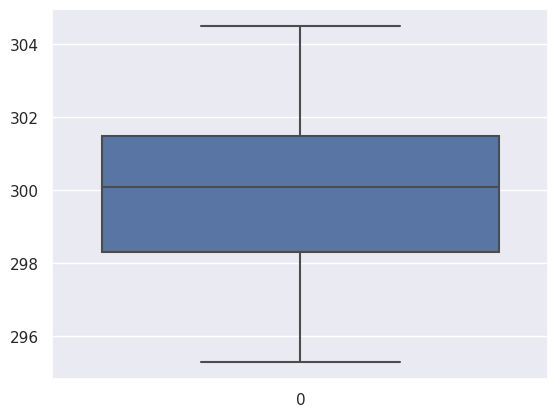

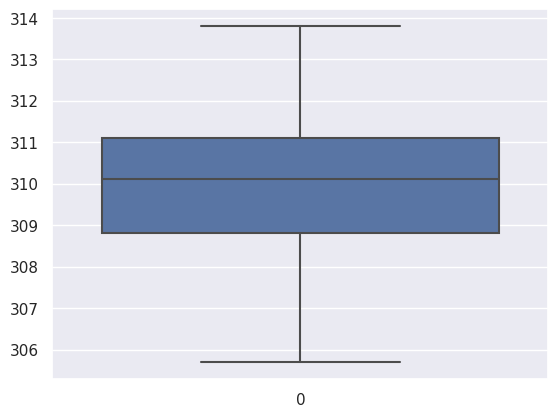

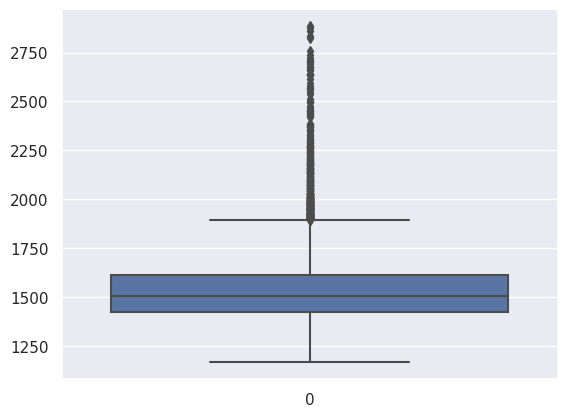

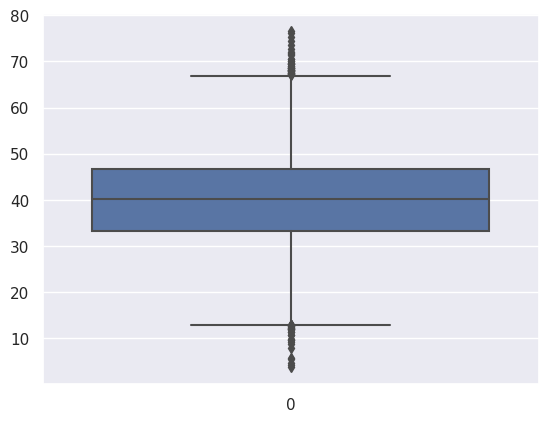

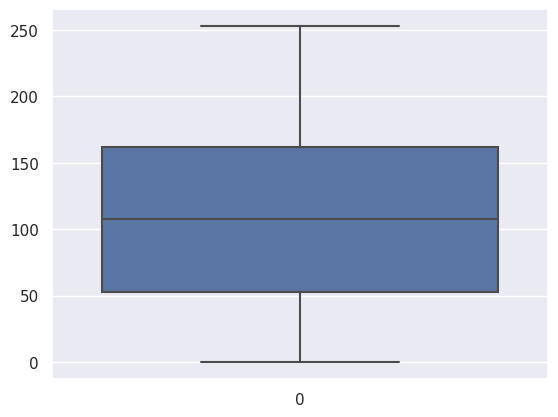

In [31]:
numerical_features = list(data.select_dtypes(exclude = ['object']).columns)
numerical_features.remove('Target')
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.show()

In [32]:
for feature in numerical_features:
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    data[feature] = np.where(data[feature] > upper_limit, upper_limit,
                             np.where(data[feature] < lower_limit, lower_limit, data[feature]))

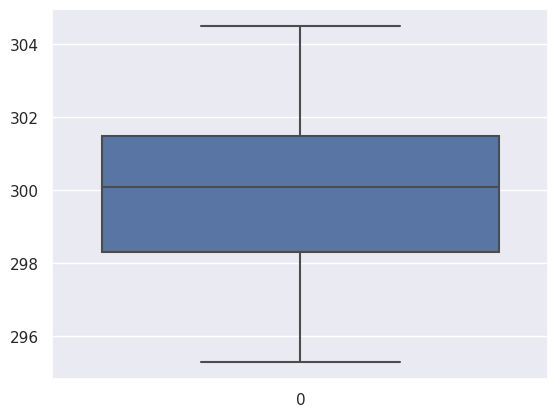

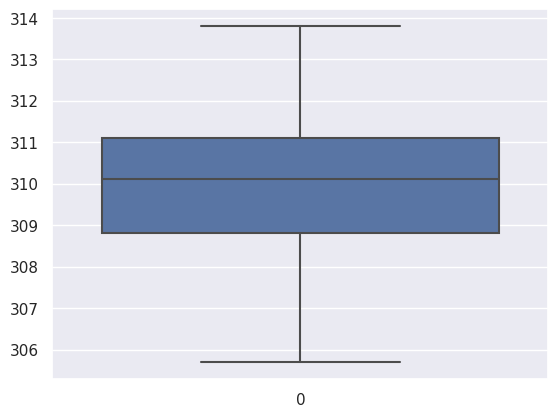

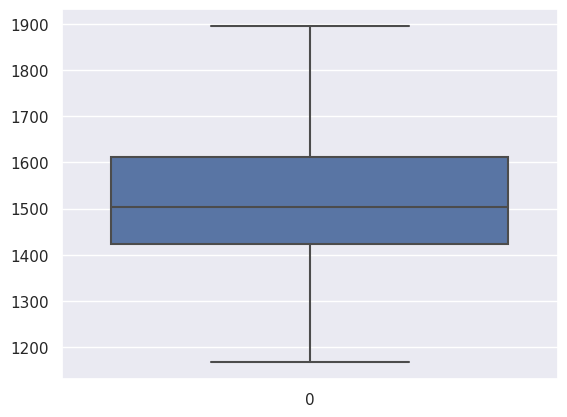

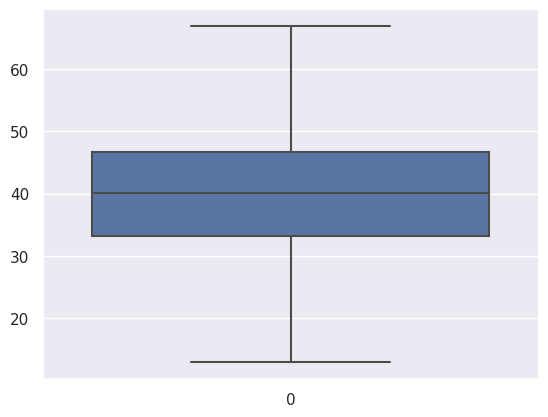

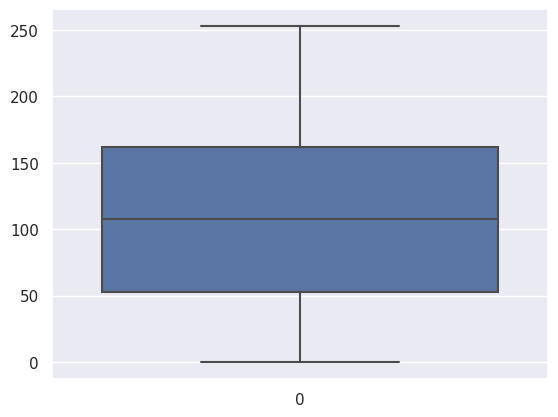

In [33]:
for feature in numerical_features:
    sns.boxplot(data[feature])
    plt.show()

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9973 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     9973 non-null   object 
 1   Air temperature [K]      9973 non-null   float64
 2   Process temperature [K]  9973 non-null   float64
 3   Rotational speed [rpm]   9973 non-null   float64
 4   Torque [Nm]              9973 non-null   float64
 5   Tool wear [min]          9973 non-null   float64
 6   Target                   9973 non-null   int64  
 7   Failure Type             9973 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 959.3+ KB


In [35]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1530.236238,39.974952,107.921087,0.033089
std,2.000548,1.483692,148.867989,9.908356,63.649152,0.178879
min,295.300000,305.700000,1168.000000,12.950000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,1895.500000,66.950000,253.000000,1.000000


In [36]:
data.describe(include = 'O')

,Type,Failure Type
count,9973,9973
unique,3,5
top,L,No Failure
freq,5984,9643


In [37]:
df = data['Type'].value_counts().reset_index()

In [38]:
df.rename({'Type': 'count'}, axis = 1, inplace = True)

In [39]:
df.rename({'index': 'Type'}, axis = 1, inplace = True)

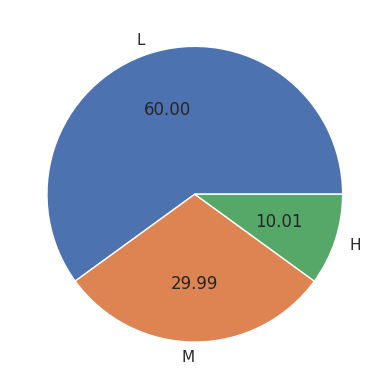

In [40]:
plt.pie(df['count'], labels = df['Type'], autopct = '%.2f')
plt.show()

In [41]:
df1 = data['Failure Type'].value_counts().reset_index()

In [42]:
df1.rename({'Failure Type': 'count'}, axis = 1, inplace = True)
df1.rename({'index': 'Failure Type'}, axis = 1, inplace = True)
df1

,Failure Type,count
0,No Failure,9643
1,Heat Dissipation Failure,112
2,Power Failure,95
3,Overstrain Failure,78
4,Tool Wear Failure,45


<Axes: ylabel='count'>

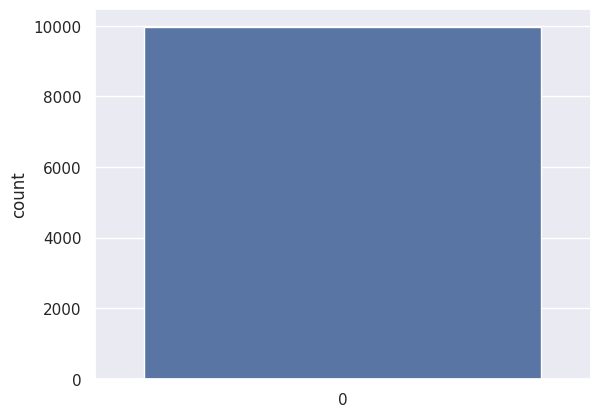

In [43]:
sns.countplot(data['Target'])

In [44]:
data_processed = pd.get_dummies(data, drop_first = True)

In [45]:
data_processed.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M,Failure Type_No Failure,Failure Type_Overstrain Failure,Failure Type_Power Failure,Failure Type_Tool Wear Failure
0,298.1,308.6,1551.0,42.8,0.0,0,0,1,1,0,0,0
1,298.2,308.7,1408.0,46.3,3.0,0,1,0,1,0,0,0
2,298.1,308.5,1498.0,49.4,5.0,0,1,0,1,0,0,0
3,298.2,308.6,1433.0,39.5,7.0,0,1,0,1,0,0,0
4,298.2,308.7,1408.0,40.0,9.0,0,1,0,1,0,0,0


In [46]:
X = data_processed[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Type_L', 'Type_M']]
y = data_processed[['Target']]

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
columns = list(X.columns)
X_scaled = pd.DataFrame(X_scaled, columns=columns)
X_scaled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Type_L,Type_M
0,-0.951417,-0.946356,0.139485,0.285132,-1.695647,-1.224796,1.527854
1,-0.901428,-0.878954,-0.821146,0.638387,-1.648511,0.816462,-0.654513
2,-0.951417,-1.013759,-0.216553,0.951270,-1.617087,0.816462,-0.654513
3,-0.901428,-0.946356,-0.653204,-0.047937,-1.585664,0.816462,-0.654513
4,-0.901428,-0.878954,-0.821146,0.002528,-1.554240,0.816462,-0.654513
...,...,...,...,...,...,...,...
9968,-0.601495,-1.081162,0.495523,-1.057237,-1.475680,-1.224796,1.527854
9969,-0.551506,-1.081162,0.683618,-0.825098,-1.428545,-1.224796,-0.654513
9970,-0.501517,-0.946356,0.770948,-0.663610,-1.349985,-1.224796,1.527854
9971,-0.501517,-0.878954,-0.821146,0.860433,-1.302849,-1.224796,-0.654513


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.20, stratify = y)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(features):
    vif = [variance_inflation_factor(X_train[features].values, i) for i in range(len(features))]
    vif_data = pd.DataFrame()
    vif_data['feature'] = features
    vif_data['vif'] = vif
    print(vif_data)

features = X_train.columns.to_list()
calculate_vif(features)

                   feature       vif
0      Air temperature [K]  4.295013
1  Process temperature [K]  4.293434
2   Rotational speed [rpm]  6.009878
3              Torque [Nm]  6.007956
4          Tool wear [min]  1.000389
5                   Type_L  2.796451
6                   Type_M  2.796234


In [50]:
sampler = RandomOverSampler()
X_sampled, y_sampled = sampler.fit_resample(X_train, y_train)

In [52]:
print(len(X_sampled))
print(len(y_sampled))

15428
15428


In [53]:
logit_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier(n_estimators = 150)
svm_model = SVC()

LogisticRegression()
73.88471177944862
75.97225823178636
[[1423  506]
 [  15   51]]
              precision    recall  f1-score   support

           0       0.99      0.74      0.85      1929
           1       0.09      0.77      0.16        66

    accuracy                           0.74      1995
   macro avg       0.54      0.76      0.50      1995
weighted avg       0.96      0.74      0.82      1995



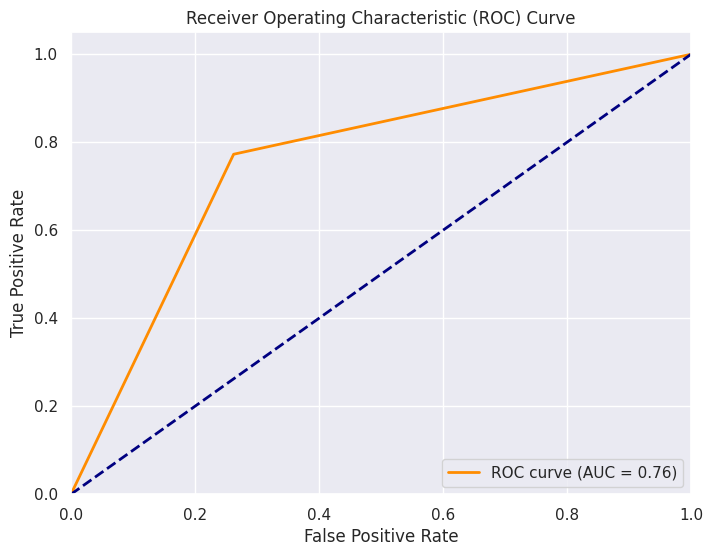

*************************************************
RandomForestClassifier()
98.24561403508771
100.0
[[1922    7]
 [  28   38]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1929
           1       0.84      0.58      0.68        66

    accuracy                           0.98      1995
   macro avg       0.92      0.79      0.84      1995
weighted avg       0.98      0.98      0.98      1995



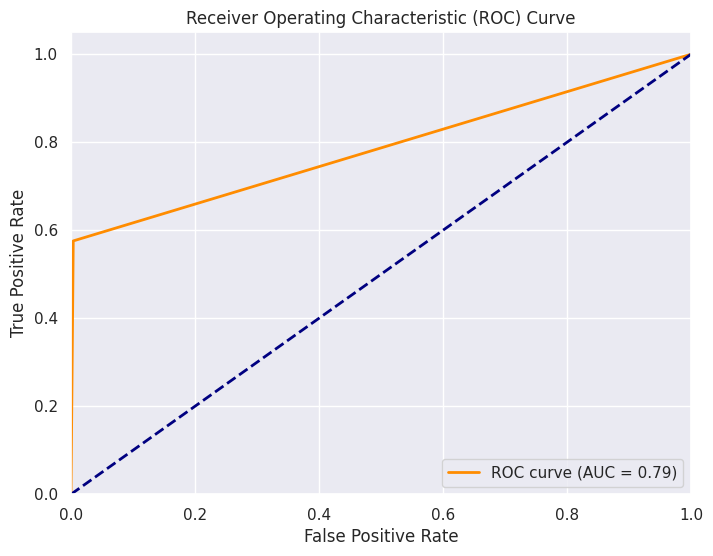

*************************************************
GradientBoostingClassifier(n_estimators=150)
94.08521303258145
97.83510500388903
[[1816  113]
 [   5   61]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1929
           1       0.35      0.92      0.51        66

    accuracy                           0.94      1995
   macro avg       0.67      0.93      0.74      1995
weighted avg       0.98      0.94      0.95      1995



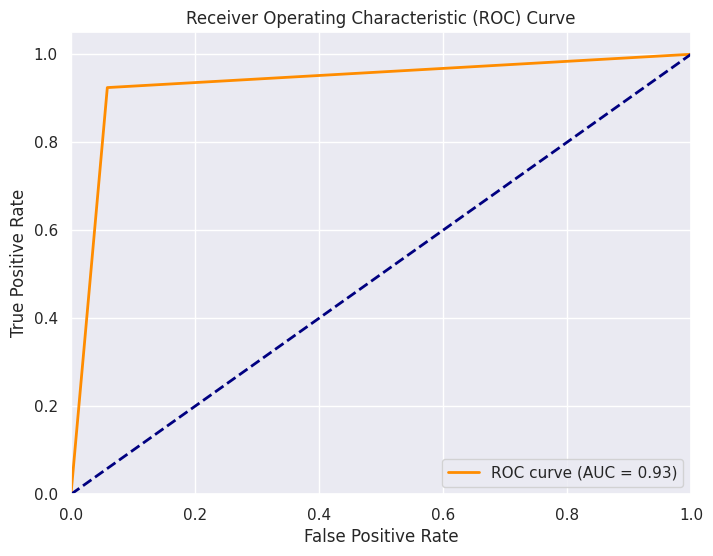

*************************************************
SVC()
90.17543859649123
95.54057557687322
[[1739  190]
 [   6   60]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95      1929
           1       0.24      0.91      0.38        66

    accuracy                           0.90      1995
   macro avg       0.62      0.91      0.66      1995
weighted avg       0.97      0.90      0.93      1995



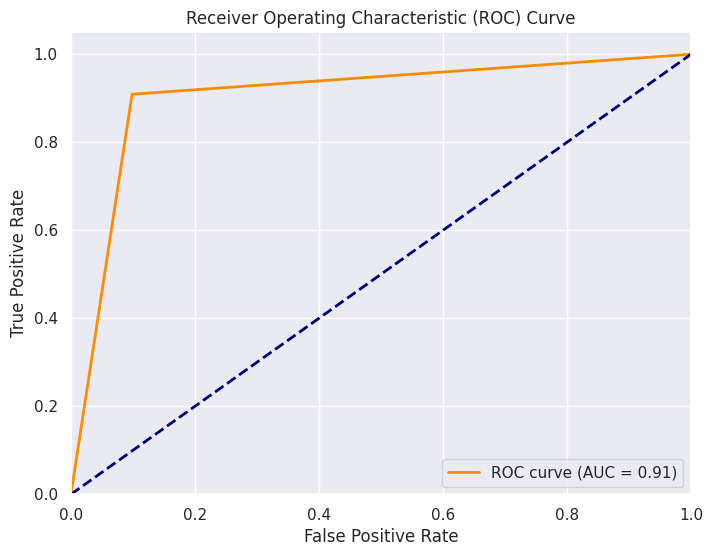

*************************************************


In [54]:
models = [logit_model, random_forest_model, gradient_boosting_model, svm_model]
for model in models:
    model.fit(X_sampled, y_sampled)
    y_train_pred = model.predict(X_sampled)
    y_test_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_test_pred)
    accuracy_train = accuracy_score(y_sampled, y_train_pred)
    report = classification_report(y_test, y_test_pred)
    cm = confusion_matrix(y_test, y_test_pred)
    print(model)
    print(accuracy_test * 100)
    print(accuracy_train * 100)
    print(cm)
    print(report)
    fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
    # Calculate AUC
    roc_auc = auc(fpr, tpr)
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
    print('*************************************************')

In [55]:
accuracy_scores = []
error_rate = []
for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(X_sampled, y_sampled)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
print(accuracy_score)

<function accuracy_score at 0x7a37b786e290>


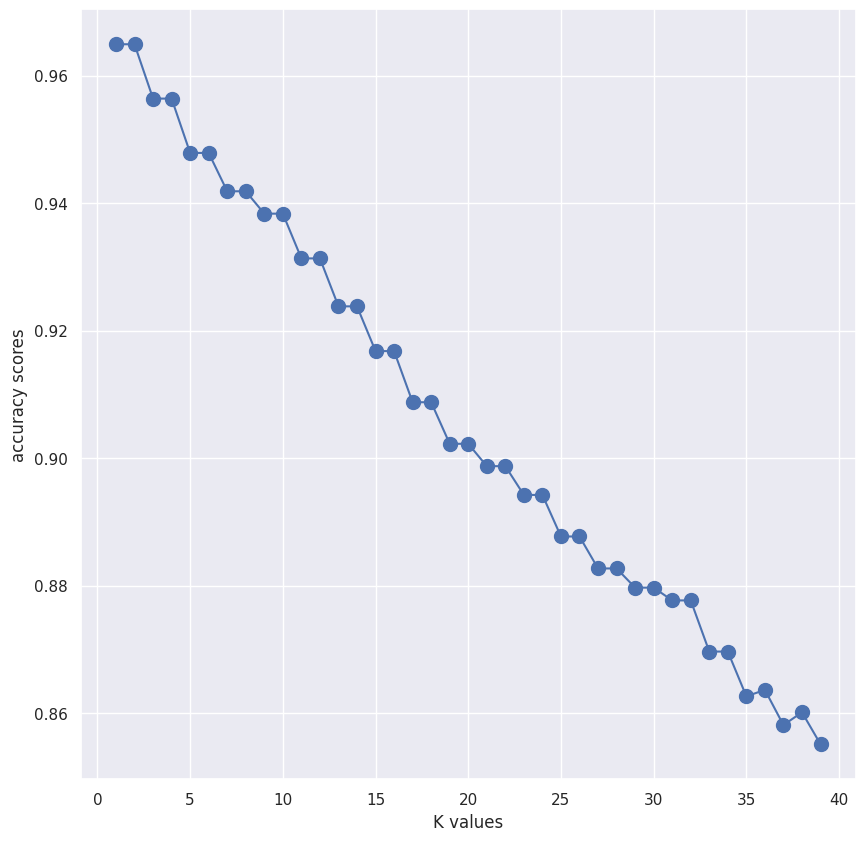

In [56]:
plt.figure(figsize = (10, 10))
plt.plot(range(1, 40), accuracy_scores, marker = 'o', markersize = 10)
plt.xlabel('K values')
plt.ylabel('accuracy scores')
plt.show()

In [57]:
from sklearn.model_selection import RandomizedSearchCV

In [58]:
n_neighbors = np.arange(3, 50, step = 2)
algorithm=["auto","ball_tree","kd_tree","brute"]
p=np.arange(1,3)

In [59]:
knn_param = {"n_neighbors": n_neighbors, "algorithm": algorithm, 'p': p}

In [60]:
knn_param

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39, 41, 43, 45, 47, 49]),
 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
 'p': array([1, 2])}

In [61]:
random_cv = RandomizedSearchCV(knn, knn_param, cv = 10, n_jobs = -1)

In [62]:
random_cv.fit(X_sampled, y_sampled)
print("the best parameter combination",random_cv.best_params_)

the best parameter combination {'p': 2, 'n_neighbors': 3, 'algorithm': 'brute'}


In [63]:
print("the best score ",random_cv.best_score_)

the best score  0.9874254089217611


In [65]:
knn_model = KNeighborsClassifier(p = 1, n_neighbors = 7, algorithm = 'kd_tree', metric = 'minkowski')

In [66]:
knn_model.fit(X_sampled, y_sampled)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, p=1)

In [67]:
KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, p=1)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=7, p=1)

In [68]:
y_test_pred = knn_model.predict(X_test)

In [69]:
print(accuracy_score(y_test, y_test_pred) * 100)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

94.38596491228071
[[1838   91]
 [  21   45]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1929
           1       0.33      0.68      0.45        66

    accuracy                           0.94      1995
   macro avg       0.66      0.82      0.71      1995
weighted avg       0.97      0.94      0.95      1995



In [70]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551.0,42.8,0.0,0,No Failure
1,L,298.2,308.7,1408.0,46.3,3.0,0,No Failure
2,L,298.1,308.5,1498.0,49.4,5.0,0,No Failure
3,L,298.2,308.6,1433.0,39.5,7.0,0,No Failure
4,L,298.2,308.7,1408.0,40.0,9.0,0,No Failure


In [71]:
df = data.copy()
df.drop(['Failure Type'], axis = 1, inplace = True)

In [72]:
df = pd.get_dummies(df, drop_first = True)

In [73]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,298.1,308.6,1551.0,42.8,0.0,0,0,1
1,298.2,308.7,1408.0,46.3,3.0,0,1,0
2,298.1,308.5,1498.0,49.4,5.0,0,1,0
3,298.2,308.6,1433.0,39.5,7.0,0,1,0
4,298.2,308.7,1408.0,40.0,9.0,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14.0,0,0,1
9996,298.9,308.4,1632.0,31.8,17.0,0,0,0
9997,299.0,308.6,1645.0,33.4,22.0,0,0,1
9998,299.0,308.7,1408.0,48.5,25.0,0,0,0


In [74]:
X1 = df

In [75]:
y1 = data[['Failure Type']]

In [76]:
y1.value_counts()

Failure Type            
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
dtype: int64

In [77]:
mapping = {
    'No Failure':0,
    'Heat Dissipation Failure': 1,
    'Power Failure': 2,
    'Overstrain Failure': 3,
    'Tool Wear Failure': 4
}

In [78]:
y1['Failure Type'] = y1['Failure Type'].map(mapping)

In [80]:
X1

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,298.1,308.6,1551.0,42.8,0.0,0,0,1
1,298.2,308.7,1408.0,46.3,3.0,0,1,0
2,298.1,308.5,1498.0,49.4,5.0,0,1,0
3,298.2,308.6,1433.0,39.5,7.0,0,1,0
4,298.2,308.7,1408.0,40.0,9.0,0,1,0
...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604.0,29.5,14.0,0,0,1
9996,298.9,308.4,1632.0,31.8,17.0,0,0,0
9997,299.0,308.6,1645.0,33.4,22.0,0,0,1
9998,299.0,308.7,1408.0,48.5,25.0,0,0,0


In [82]:
y1

,Failure Type
0,0
1,0
2,0
3,0
4,0
...,...
9995,0
9996,0
9997,0
9998,0


In [83]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)
columns = list(X1.columns)
X1_scaled = pd.DataFrame(X1_scaled, columns=columns)
X1_scaled

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Type_L,Type_M
0,-0.951417,-0.946356,0.139485,0.285132,-1.695647,-0.184991,-1.224796,1.527854
1,-0.901428,-0.878954,-0.821146,0.638387,-1.648511,-0.184991,0.816462,-0.654513
2,-0.951417,-1.013759,-0.216553,0.951270,-1.617087,-0.184991,0.816462,-0.654513
3,-0.901428,-0.946356,-0.653204,-0.047937,-1.585664,-0.184991,0.816462,-0.654513
4,-0.901428,-0.878954,-0.821146,0.002528,-1.554240,-0.184991,0.816462,-0.654513
...,...,...,...,...,...,...,...,...
9968,-0.601495,-1.081162,0.495523,-1.057237,-1.475680,-0.184991,-1.224796,1.527854
9969,-0.551506,-1.081162,0.683618,-0.825098,-1.428545,-0.184991,-1.224796,-0.654513
9970,-0.501517,-0.946356,0.770948,-0.663610,-1.349985,-0.184991,-1.224796,1.527854
9971,-0.501517,-0.878954,-0.821146,0.860433,-1.302849,-0.184991,-1.224796,-0.654513


In [84]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, y1, test_size = 0.20, stratify = y1)

In [85]:
sampler = RandomOverSampler()
X1_sampled, y1_sampled = sampler.fit_resample(X1_train, y1_train)

In [86]:
print(len(X1_sampled))
print(len(y1_sampled))

38570
38570


In [87]:
y1_sampled.value_counts()

Failure Type
0               7714
1               7714
2               7714
3               7714
4               7714
dtype: int64

In [88]:
logit_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
gradient_boosting_model = GradientBoostingClassifier(n_estimators = 150)
svm_model = SVC()

In [89]:
models = [logit_model, random_forest_model, gradient_boosting_model, svm_model]
for model in models:
    model.fit(X1_sampled, y1_sampled)
    y1_train_pred = model.predict(X1_sampled)
    y1_test_pred = model.predict(X1_test)
    accuracy_test = accuracy_score(y1_test, y1_test_pred)
    accuracy_train = accuracy_score(y1_sampled, y1_train_pred)
    report = classification_report(y1_test, y1_test_pred)
    cm = confusion_matrix(y1_test, y1_test_pred)
    print(model)
    print(accuracy_test * 100)
    print(accuracy_train * 100)
    print(cm)
    print(report)
    print('*************************************************')

LogisticRegression()
99.74937343358395
93.86829141820068
[[1929    0    0    0    0]
 [   0   21    0    1    0]
 [   0    2   16    0    1]
 [   0    1    0   15    0]
 [   0    0    0    0    9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1929
           1       0.88      0.95      0.91        22
           2       1.00      0.84      0.91        19
           3       0.94      0.94      0.94        16
           4       0.90      1.00      0.95         9

    accuracy                           1.00      1995
   macro avg       0.94      0.95      0.94      1995
weighted avg       1.00      1.00      1.00      1995

*************************************************
RandomForestClassifier()
99.79949874686717
100.0
[[1929    0    0    0    0]
 [   0   22    0    0    0]
 [   0    1   17    1    0]
 [   0    0    1   15    0]
 [   0    0    0    1    8]]
              precision    recall  f1-score   support

           0      

In [90]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
best_features=SelectKBest(score_func = mutual_info_classif, k = len(X1_sampled.columns))
best_features.fit(X1_sampled, y1_sampled)
best_features.scores_
dfscores=pd.DataFrame(best_features.scores_)
dfcolumns=pd.DataFrame(X1_sampled.columns)
featurescores=pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=["Feature_name","Importance"]
featurescores.sort_values(by = 'Importance', ascending = False, ignore_index = True)

,Feature_name,Importance
0,Torque [Nm],1.284979
1,Rotational speed [rpm],1.165831
2,Tool wear [min],0.973690
3,Air temperature [K],0.556939
4,Target,0.508027
5,Process temperature [K],0.421287
6,Type_L,0.047995
7,Type_M,0.036314


<BarContainer object of 8 artists>

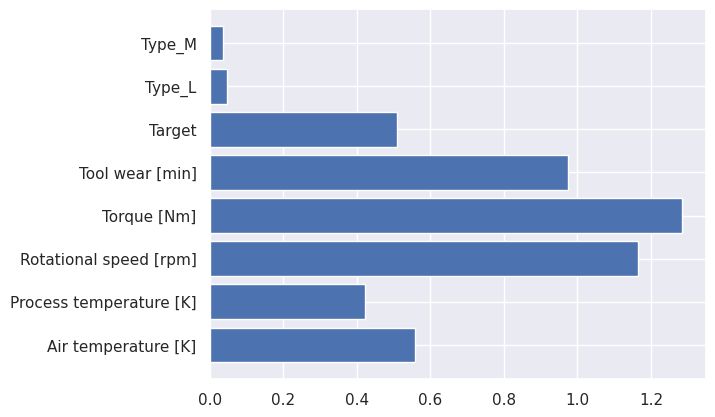

In [91]:
plt.barh(featurescores['Feature_name'], featurescores['Importance'])